In [1]:
#Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")


## 1. Data Curation

In [2]:
#loading data - only available in xlsx from Microsoft Forms
df = pd.read_excel("survey_data_raw.xlsx")
df['ID'] = range(1,len(df)+1)

In [3]:


#dropping empty/unnecesary columns. Renaming questions to the assesed value
try: 
    df=df.drop(df[['Starttidspunkt',
    'Færdiggørelsestidspunkt', 
    'Mail','Navn','Help us out down the line! Leave your email here and we will reach out to you with additional questions :) (optional)'
    ]], axis=1)
    df.rename(columns={'How worried are you about global warming?': 'worry-1', 
    'How hopeful are you that our society will reach "carbon neutrality" before 2050?': 'hope',
    'Overall, how confident are you that your climate action can help mitigate climate change?': 'self-efficacy-1',
    'To which extent do you think your climate actions mitigate climate change?': 'response-efficacy',
    'I would be willing to give up certain services and products that are convenient for me if this protected the climate' : 'willingness-to-sacrifice',
    'How knowledgeable do you feel about climate change?': 'self-perceived-knowledge',
    'I am the type of person who acts environmental friendly' : 'self-identity',
    'Overall, how confident are you that you could reduce your carbon footprint even more than today?' : 'self-efficacy-2',
    'Are you worried about the consequences of climate change?' : 'worry-2',
    'How old are you?' : 'age',
    "What's your nationality?" :'nationality',
    'What is your gender? (Optional)' : 'gender',
    'What is the highest level of education you have completed or currently undertaking?' : 'education-level',
}, inplace=True)
except:
    print('columns not found or already removed')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        209 non-null    int64  
 1   worry-1                   209 non-null    int64  
 2   hope                      209 non-null    int64  
 3   self-efficacy-1           209 non-null    int64  
 4   response-efficacy         209 non-null    int64  
 5   willingness-to-sacrifice  209 non-null    int64  
 6   self-perceived-knowledge  209 non-null    int64  
 7   self-identity             209 non-null    int64  
 8   self-efficacy-2           208 non-null    float64
 9   worry-2                   208 non-null    float64
 10  age                       209 non-null    int64  
 11  nationality               207 non-null    object 
 12  gender                    206 non-null    object 
 13  education-level           208 non-null    object 
dtypes: float64

In [5]:
#summary statistics of numeric values excluding ID column.
df.loc[:,df.columns!='ID'].describe()

,worry-1,hope,self-efficacy-1,response-efficacy,willingness-to-sacrifice,self-perceived-knowledge,self-identity,self-efficacy-2,worry-2,age
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,208.000000,208.000000,209.000000
mean,8.114833,4.808612,6.205742,5.497608,7.928230,7.057416,6.727273,8.298077,8.543269,35.287081
std,1.874992,2.438025,2.379957,2.117065,1.928934,1.825712,1.888037,1.735560,1.768772,12.582951
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,7.000000,3.000000,5.000000,4.000000,7.000000,6.000000,6.000000,8.000000,8.000000,25.000000
50%,8.000000,5.000000,7.000000,6.000000,8.000000,7.000000,7.000000,8.000000,9.000000,30.000000
75%,10.000000,7.000000,8.000000,7.000000,10.000000,8.000000,8.000000,10.000000,10.000000,45.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,79.000000


In [6]:
#correcting spelling mistake in questionnaire and removing case from both. 
df['gender'].loc[df['gender']=='Femal'] = 'Female'
df['gender'] = df['gender'].str.lower()

In [7]:
#lowering case for all content in nationality
df['nationality'] = df['nationality'].str.lower()
df['nationality'] = df['nationality'].str.strip()

In [8]:
#danish categories 
for i in ['dk','dansk','denmark','dane','danish']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'danish'

#replacing single d from user input - high likelyhood that it belongs to danish
df['nationality'].loc[df['nationality']=='d'] = 'danish'
#german categories 
for i in ['german','germany','germo']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'german'
#norwegian categories
for i in ['norwegian','norway']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'norwegian'
#swedish categories 
for i in ['swedish','sweden']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'swedish'
#finnish categories 
for i in ['finnish','finland']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'finnish'
#belgian categories 
for i in ['belgium','belgian']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'belgian'
#portuguese categories
for i in ['portugal','portuguese']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'portuguese'
#uk categories 
for i in ['irish','gb','british']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'uk'
#american categories 
for i in ['us','american','usa']: 
    df.loc[df['nationality'].str.contains(i,case=False, na=False,),'nationality'] = 'american'
#greece 
df['nationality'].loc[df['nationality']=='greece'] = 'greek'
#df['nationality'].value_counts()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        209 non-null    int64  
 1   worry-1                   209 non-null    int64  
 2   hope                      209 non-null    int64  
 3   self-efficacy-1           209 non-null    int64  
 4   response-efficacy         209 non-null    int64  
 5   willingness-to-sacrifice  209 non-null    int64  
 6   self-perceived-knowledge  209 non-null    int64  
 7   self-identity             209 non-null    int64  
 8   self-efficacy-2           208 non-null    float64
 9   worry-2                   208 non-null    float64
 10  age                       209 non-null    int64  
 11  nationality               207 non-null    object 
 12  gender                    206 non-null    object 
 13  education-level           208 non-null    object 
dtypes: float64

In [10]:
#transforming missing value, nan, to median
df['self-efficacy-2'].loc[np.isnan(df['self-efficacy-2'])] = df['self-efficacy-2'].median()
#transforming missing value in worry-2, nan, to median 
df['worry-2'].loc[np.isnan(df['worry-2'])] = df['worry-2'].median()

#function to transform values from float to int. 
def floattoint(column_name):
    x = []
    for i in df[column_name]:
        x.append(int(i))
    df[f'{column_name}'] = x

#transforming values.
floattoint('self-efficacy-2')
floattoint('worry-2')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        209 non-null    int64 
 1   worry-1                   209 non-null    int64 
 2   hope                      209 non-null    int64 
 3   self-efficacy-1           209 non-null    int64 
 4   response-efficacy         209 non-null    int64 
 5   willingness-to-sacrifice  209 non-null    int64 
 6   self-perceived-knowledge  209 non-null    int64 
 7   self-identity             209 non-null    int64 
 8   self-efficacy-2           209 non-null    int64 
 9   worry-2                   209 non-null    int64 
 10  age                       209 non-null    int64 
 11  nationality               207 non-null    object
 12  gender                    206 non-null    object
 13  education-level           208 non-null    object
dtypes: int64(11), object(3)
me

In [12]:
#associate nationalities with regions by using a dictionary. 
regions = {
'nordics': ['swedish','finnish','danish','norwegian'],
'northern-europe': ['belgian','german','uk','dutch','swiss'],
'southern-europe' : ['italian','greek','portuguese','spanish'],
'eastern-europe' : ['polish','slovak'],
'rest' : ['american','venezuelan','iranian','indian'],
}
d = {k: oldk for oldk, oldv in regions.items() for k in oldv}
df['region'] = df['nationality'].map(d)

## 2. Exploratory Data Analysis

### 2.1 Demographcis 

In [13]:
#top 5 countries
top_5 = df['nationality'].value_counts()[:5]
x_nationality = top_5.index.tolist()
y_nationality = top_5.values.tolist()
#regions
region_counts = df['region'].value_counts()
x_region = region_counts.index.tolist()
y_region = region_counts.values.tolist()



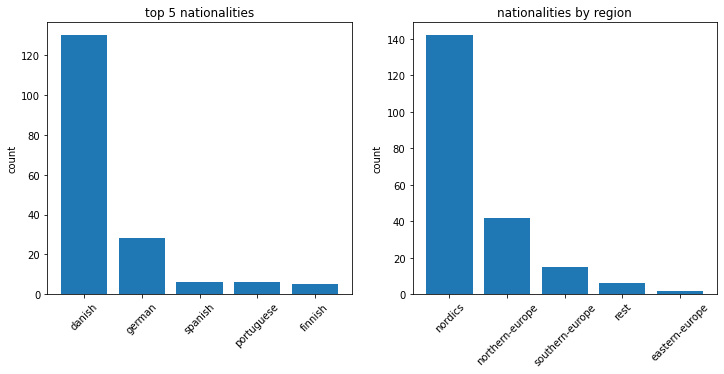

In [14]:

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.bar(x_nationality,y_nationality)
ax1.set_xticklabels(x_nationality, rotation=45)
ax1.set(title= 'top 5 nationalities', ylabel="count")
ax2.bar(x_region, y_region)
ax2.set_xticklabels(x_region, rotation=45)
ax2.set(title= 'nationalities by region', ylabel="count")
plt.show()
#a warning is shown here, remove warnings.filterwarnigns("ignore") to see. 

In [15]:
def percentage_dataframe(column):
    indexd = []
    container = []
    for i,data in enumerate(column.value_counts()):
        container.append( (data/sum(column.value_counts()))*100)
        indexd.append(column.value_counts().index[i])
    percentage_dataframe = pd.DataFrame(index=indexd,data=container, columns=['percent of total'])
    return percentage_dataframe

In [16]:
print(percentage_dataframe(df['region']))

                 percent of total
nordics                 68.599034
northern-europe         20.289855
southern-europe          7.246377
rest                     2.898551
eastern-europe           0.966184


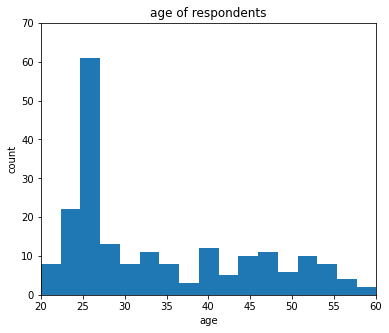

In [17]:
fig, ax = plt.subplots(figsize=(6,5))

ax.hist(df['age'], bins=25)
ax.set(title= 'age of respondents', xlabel="age",ylabel="count")
ax.axis([20,60,0,70]) #age ranges
plt.show()

In [18]:
print(df['age'].describe())
print(df['age'].median())

count    209.000000
mean      35.287081
std       12.582951
min       20.000000
25%       25.000000
50%       30.000000
75%       45.000000
max       79.000000
Name: age, dtype: float64
30.0


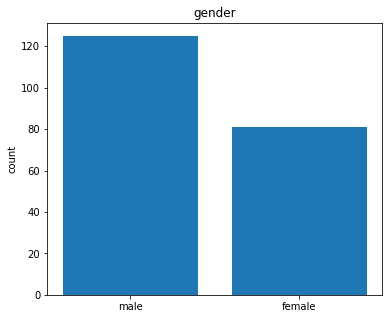

In [19]:
fig, ax_g = plt.subplots(figsize=(6,5))
gender_labels = df['gender'].value_counts().index.tolist()
gender_counts = df['gender'].value_counts()
ax_g.bar(gender_labels,gender_counts)

ax_g.set(title= 'gender',ylabel="count")
plt.show()

In [20]:
df['gender'].value_counts()[0]/df['gender'].count()

0.6067961165048543

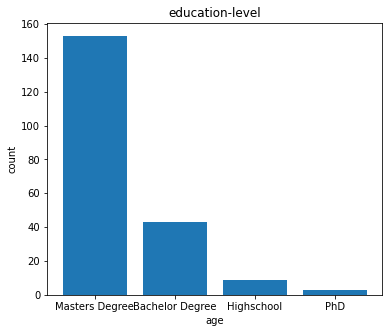

In [21]:
fig, ax_e = plt.subplots(figsize=(6,5))
education_labels = df['education-level'].value_counts().index.tolist()
education_counts = df['education-level'].value_counts()
ax_e.bar(education_labels,education_counts)

ax_e.set(title= 'education-level', xlabel="age",ylabel="count")
plt.show()

In [22]:
print(percentage_dataframe(df['education-level']))

                 percent of total
Masters Degree          73.557692
Bachelor Degree         20.673077
Highschool               4.326923
PhD                      1.442308


In [23]:
df['education-level'].value_counts()

Masters Degree     153
Bachelor Degree     43
Highschool           9
PhD                  3
Name: education-level, dtype: int64

In [24]:
#setting our focus - keeping only nordics and Northern-europe
focus_regions = ['nordics', 'northern-europe']
df = df.loc[df['region'].isin(focus_regions)]
print(df['region'].value_counts())
print(sum(df['region'].value_counts()))

nordics            142
northern-europe     42
Name: region, dtype: int64
184


### 2.2 Assesment Questions

In [25]:
assesment_questions = df[['worry-1', 'hope', 'self-efficacy-1', 'response-efficacy',
       'willingness-to-sacrifice', 'self-perceived-knowledge', 'self-identity',
       'self-efficacy-2', 'worry-2']]

assesment_questions_labels = assesment_questions.columns
assesment_questions_labels

Index(['worry-1', 'hope', 'self-efficacy-1', 'response-efficacy',
       'willingness-to-sacrifice', 'self-perceived-knowledge', 'self-identity',
       'self-efficacy-2', 'worry-2'],
      dtype='object')

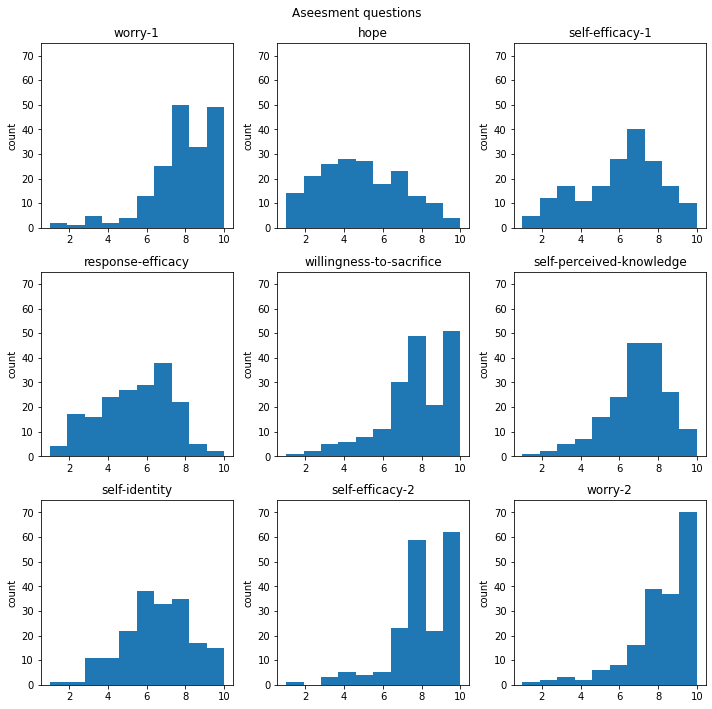

In [26]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(assesment_questions_labels):
    ax = plt.subplot(3, 3, i+1)
    ax.set(title= assesment_questions_labels[i], ylabel="count")
    ax.set_ylim(0,75)
    plt.hist(data=df, x=col)
plt.suptitle('Aseesment questions')
plt.tight_layout()

In [27]:
#average of worry column 
dfworry = ((df['worry-1']+df['worry-2'])/2)
k=6
count = 0
for i in dfworry :
    if i > k :
        count = count + 1
print('Worry score over 6:',count/len(dfworry))

Worry score over 6: 0.9021739130434783


In [28]:
#means of every assesment question
assesment_questions_means = []
for i in assesment_questions.columns: 
    assesment_questions_means.append( df[f'{i}'].mean())
mean_dataframe = pd.DataFrame(index=assesment_questions.columns,data=assesment_questions_means, columns=['mean'])
mean_dataframe

,mean
worry-1,8.081522
hope,4.804348
self-efficacy-1,6.119565
response-efficacy,5.423913
willingness-to-sacrifice,7.885870
self-perceived-knowledge,7.097826
self-identity,6.695652
self-efficacy-2,8.320652
worry-2,8.461957


In [29]:
assesment_questions_means = []
for i in assesment_questions.columns: 
    assesment_questions_means.append( df[f'{i}'].std())
mean_dataframe = pd.DataFrame(index=assesment_questions.columns,data=assesment_questions_means, columns=['std'])
mean_dataframe

,std
worry-1,1.858046
hope,2.366613
self-efficacy-1,2.325165
response-efficacy,2.065769
willingness-to-sacrifice,1.970553
self-perceived-knowledge,1.755925
self-identity,1.931839
self-efficacy-2,1.708355
worry-2,1.822347


#### 2.2.1 Correlation Analysis


In [30]:
type(assesment_questions_labels)

pandas.core.indexes.base.Index

In [31]:
assesment_questions_labels.union(['age'])

Index(['age', 'hope', 'response-efficacy', 'self-efficacy-1',
       'self-efficacy-2', 'self-identity', 'self-perceived-knowledge',
       'willingness-to-sacrifice', 'worry-1', 'worry-2'],
      dtype='object')

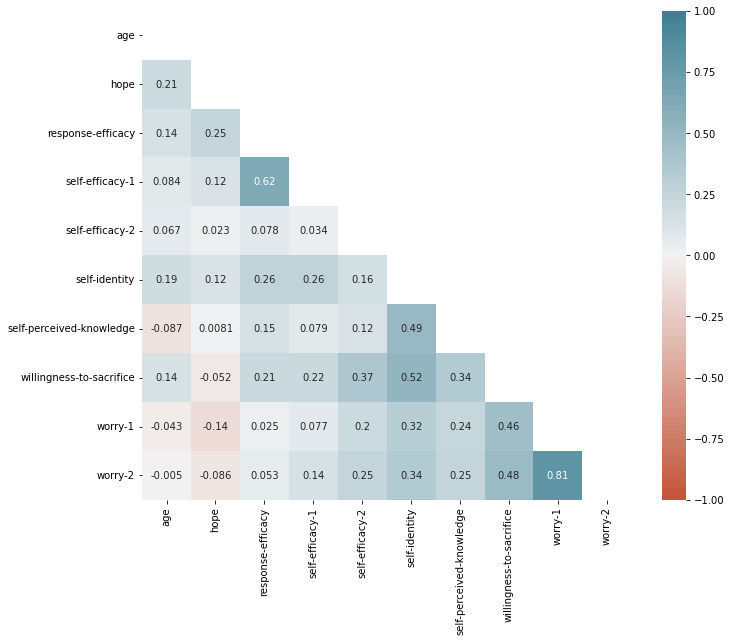

In [32]:

expanded_questions = assesment_questions_labels.union(['age'])
corr = df[expanded_questions].corr(method='spearman') #Pearson needs normal distribution. spearman takes rank. Look into this. 
mask = np.triu(corr) #preparing a mask for the upper part of the corr matrix
fig, ax = plt.subplots(figsize=(11,9))

ax = sns.heatmap(
    corr, 
    mask = mask,
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [33]:
df.head()


,ID,worry-1,hope,self-efficacy-1,response-efficacy,willingness-to-sacrifice,self-perceived-knowledge,self-identity,self-efficacy-2,worry-2,age,nationality,gender,education-level,region
0,1,9,3,4,4,7,6,4,10,9,23,german,female,Masters Degree,northern-europe
1,2,9,3,3,4,8,6,5,8,9,24,german,male,Bachelor Degree,northern-europe
2,3,9,7,8,8,9,9,8,7,10,52,danish,female,Highschool,nordics
3,4,9,5,7,5,8,5,7,9,9,55,danish,female,Bachelor Degree,nordics
4,5,9,5,9,5,7,6,8,7,10,20,german,male,Bachelor Degree,northern-europe


In [34]:
correlation_list = corr.unstack().sort_values().drop_duplicates().dropna()
correlation_list.sort_values(ascending=False)
correlation_list.sort_values(ascending=False).head(10)

age                       age                         1.000000
worry-2                   worry-1                     0.807929
self-efficacy-1           response-efficacy           0.620157
willingness-to-sacrifice  self-identity               0.524716
self-identity             self-perceived-knowledge    0.491760
worry-2                   willingness-to-sacrifice    0.481702
willingness-to-sacrifice  worry-1                     0.459365
                          self-efficacy-2             0.368355
worry-2                   self-identity               0.342826
willingness-to-sacrifice  self-perceived-knowledge    0.336169
dtype: float64

In [35]:
columns = list(assesment_questions_labels)
columns.remove('worry-1')
columns


['hope',
 'self-efficacy-1',
 'response-efficacy',
 'willingness-to-sacrifice',
 'self-perceived-knowledge',
 'self-identity',
 'self-efficacy-2',
 'worry-2']

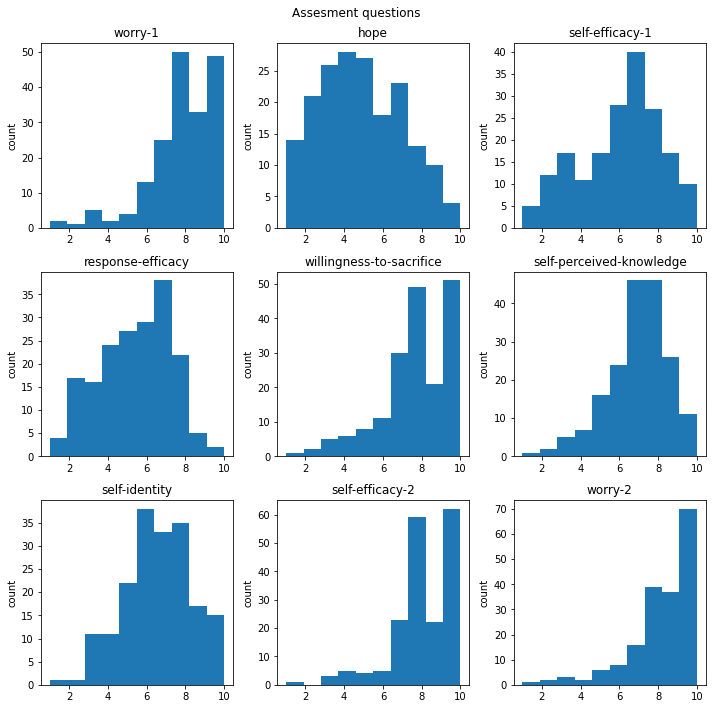

In [36]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(assesment_questions_labels):
    ax = plt.subplot(3, 3, i+1)
    ax.set(title= assesment_questions_labels[i], ylabel="count")
    plt.hist(data=df, x=col)
plt.suptitle('Assesment questions')
plt.tight_layout()

### 2.2.2 variable relationship scatter

In [37]:
#settings for 2 variable plotting to show clusters. 
color_point = 'red'
size_point = 400
opacity_setting = 0.1

#function creating the plot by using 
def plotting(fixed_variable): 
    plt.figure(figsize=(12, 12))
    for i, col in enumerate(assesment_questions_labels): #loop over the labels list. 
        ax = plt.subplot(3, 3, i+1) #subplot
        ax.set(ylabel=f"{col}",xlabel=f'{fixed_variable}') #labels
        plt.scatter(x=df[f'{fixed_variable}'],
                    y=df[f'{col}'],
                    c=color_point,
                    s=size_point, 
                    alpha=opacity_setting) #scatterplot
    plt.suptitle(f'fixed variable: {fixed_variable}')
    plt.tight_layout()

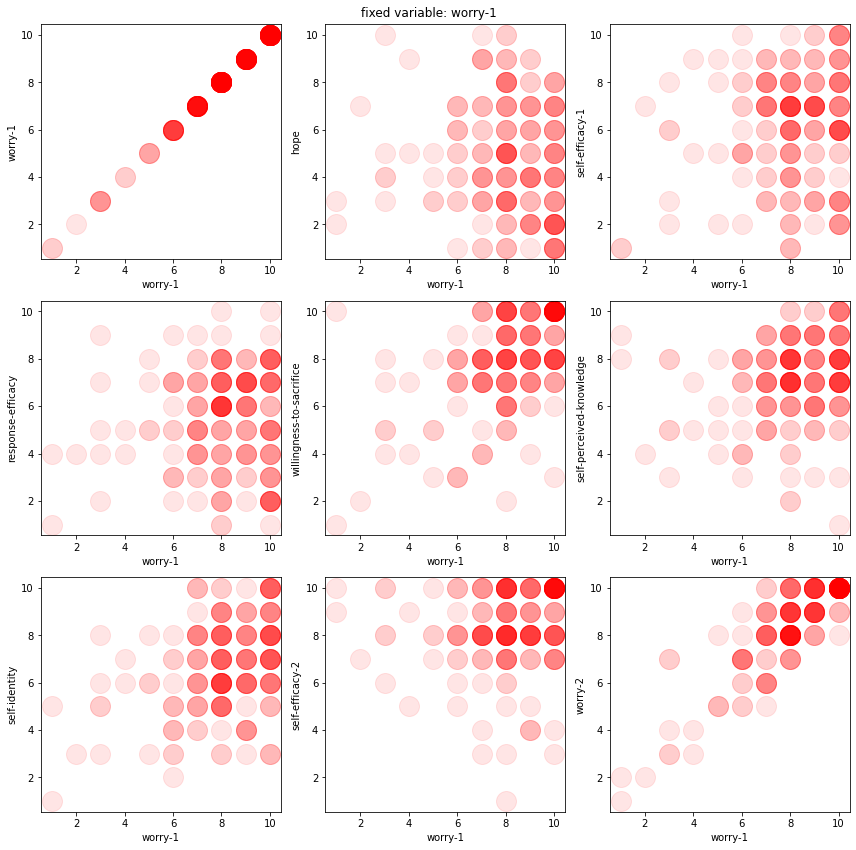

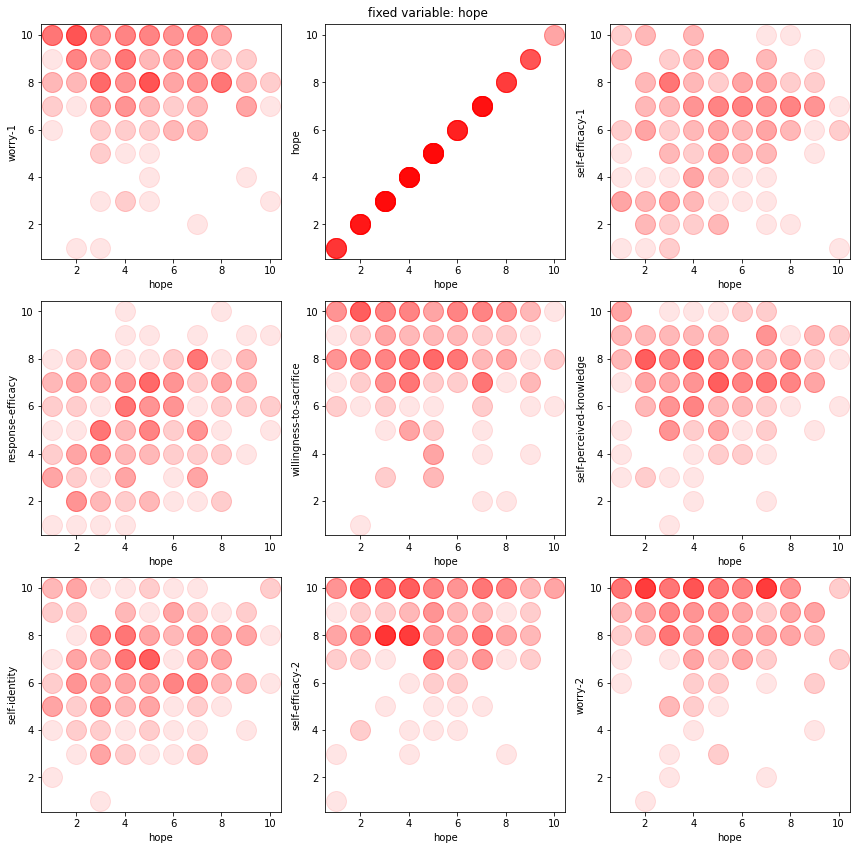

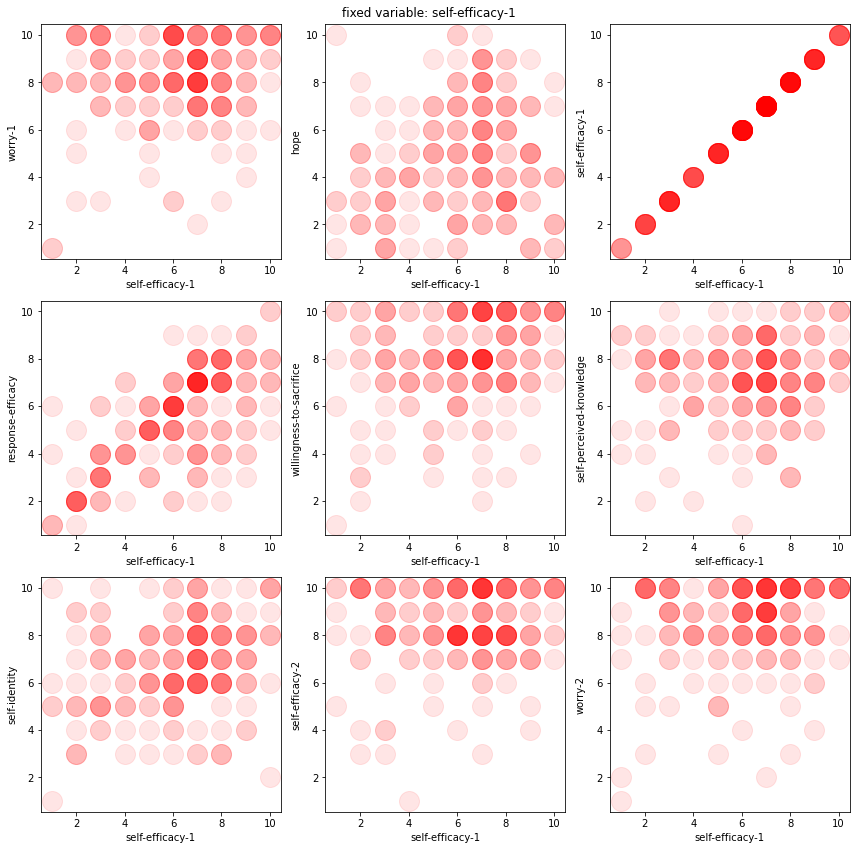

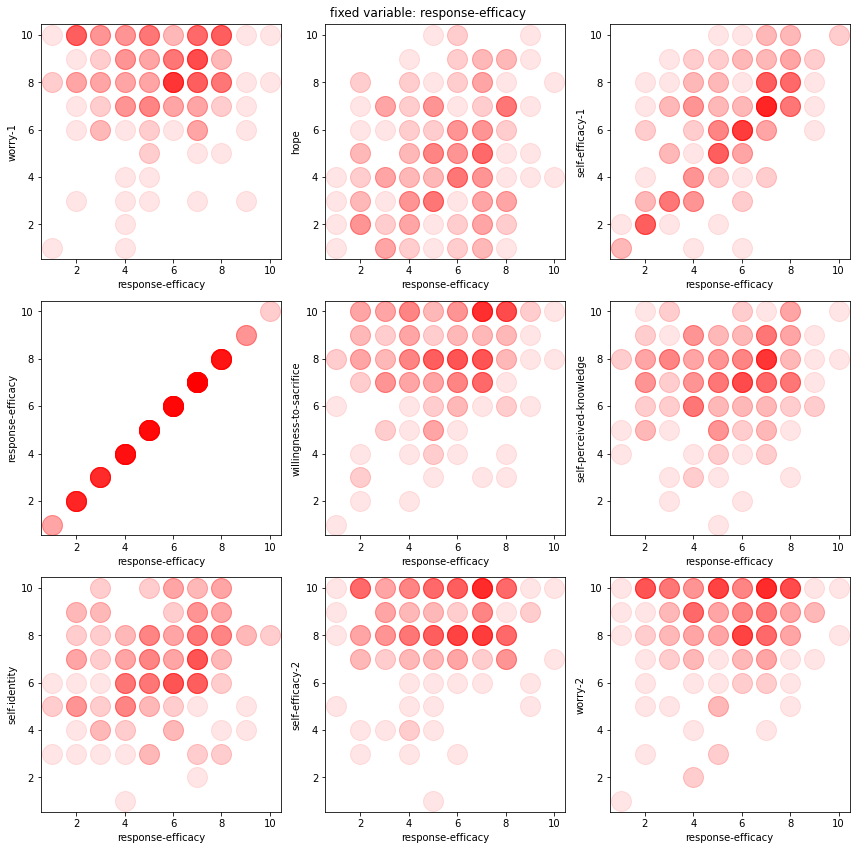

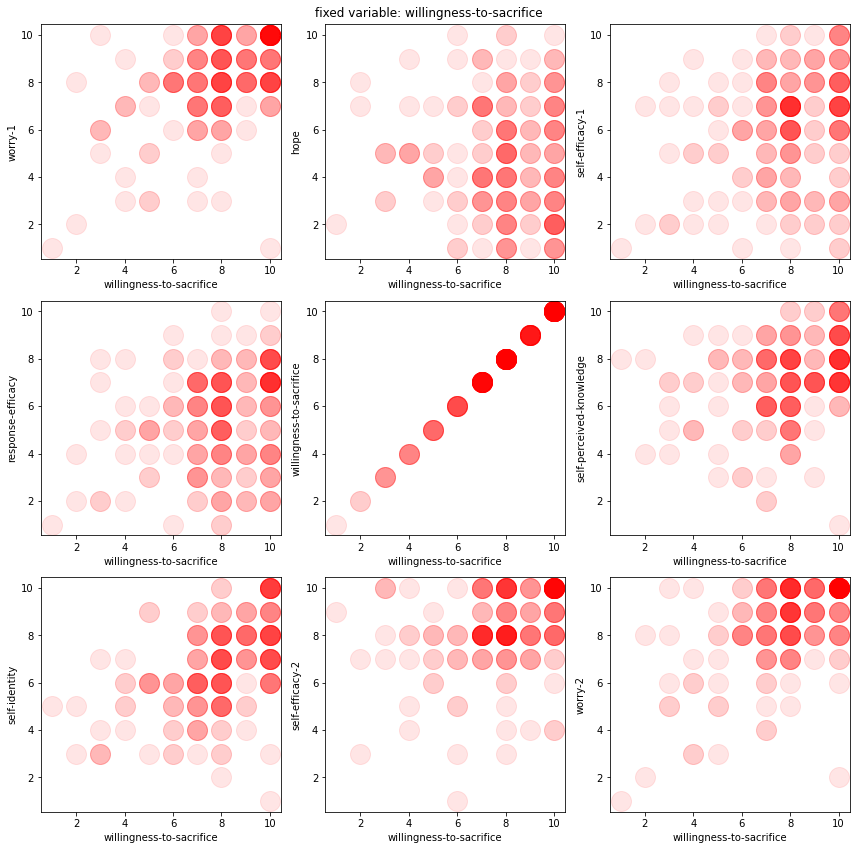

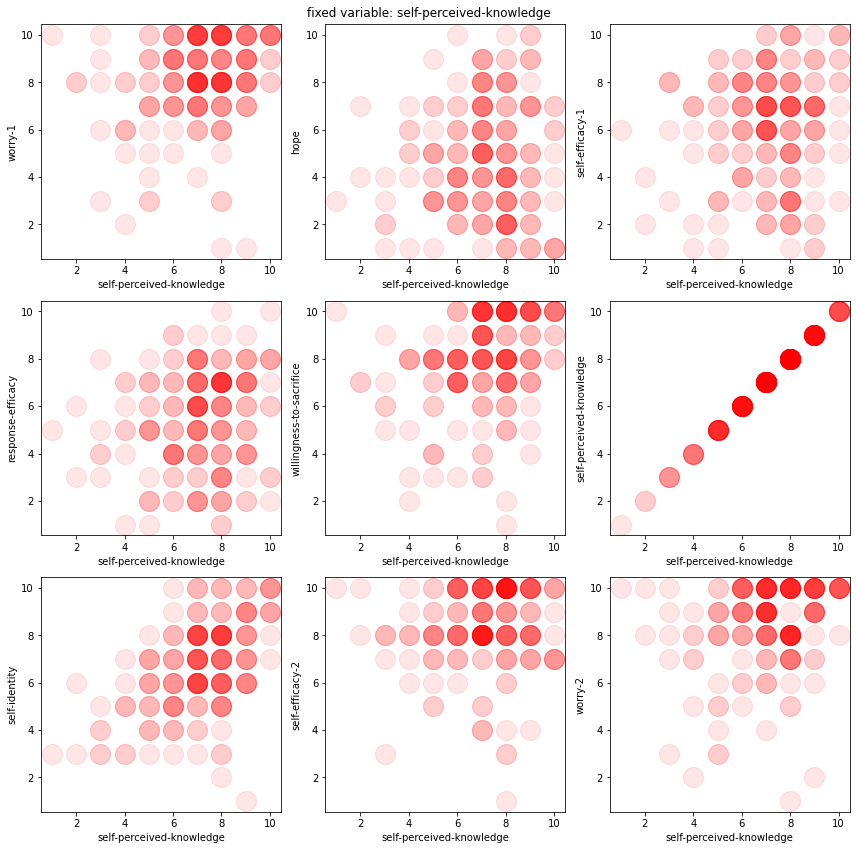

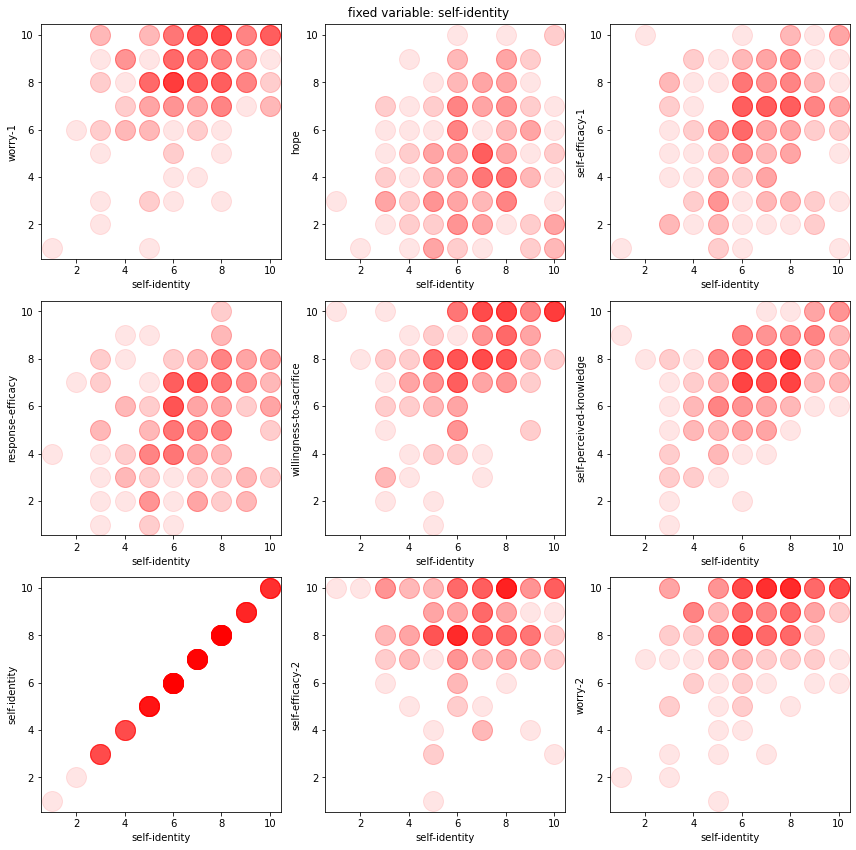

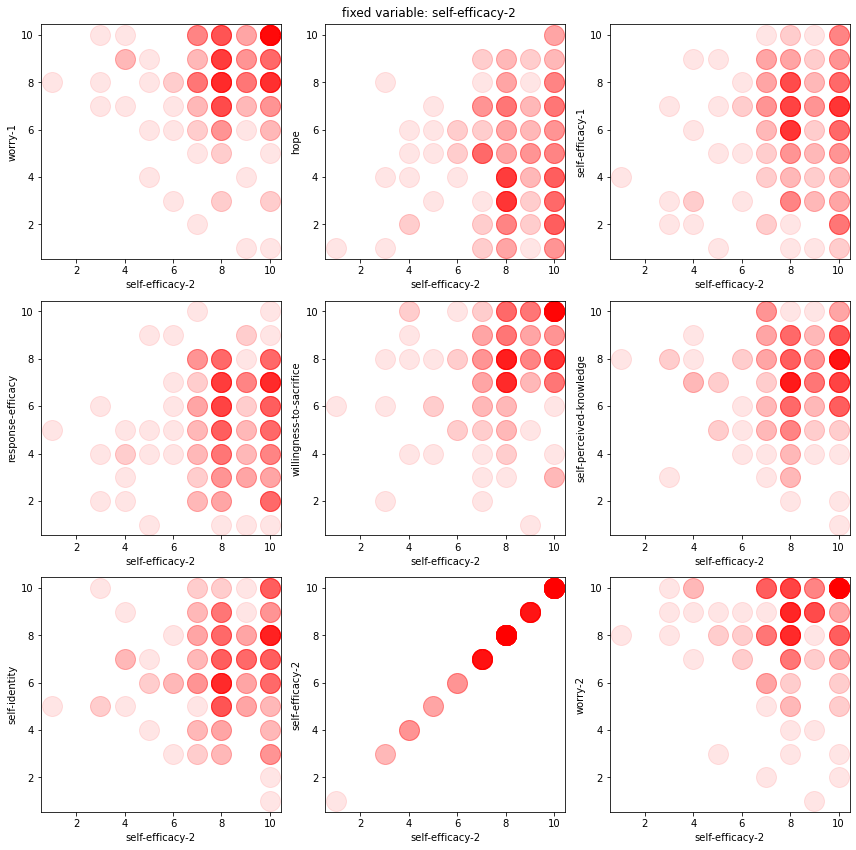

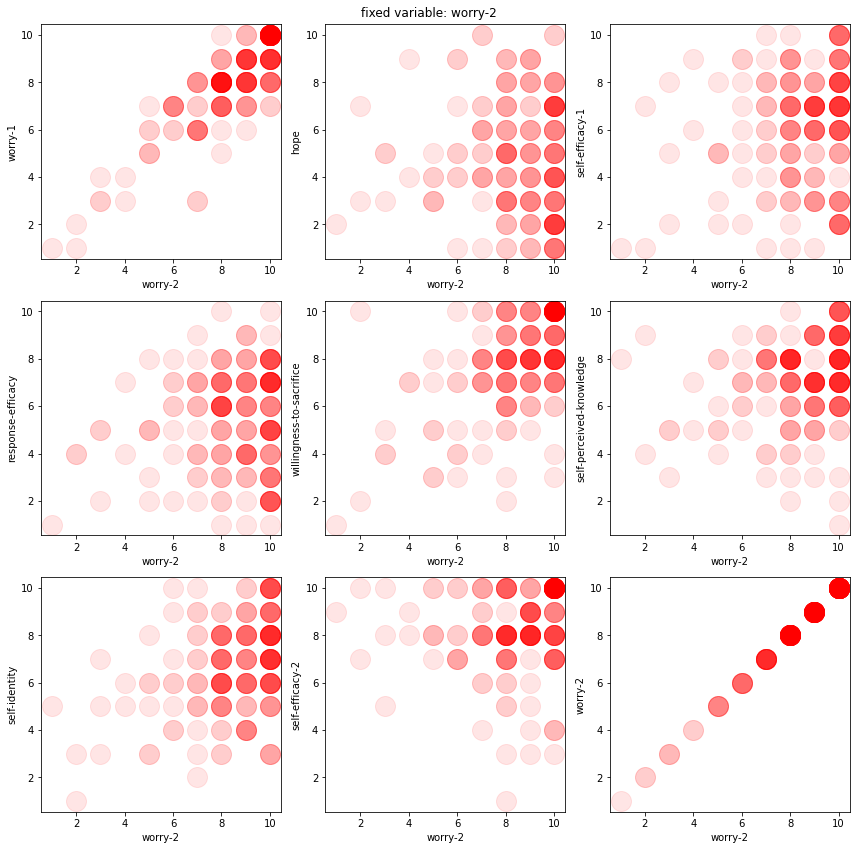

In [38]:
#looping to plot all possible relationships. 
for i in assesment_questions_labels: 
    fixed_variable = i
    plotting(fixed_variable)

In [39]:
testdf = df[['hope', 'self-efficacy-1', 'self-identity','response-efficacy']]

In [40]:
#4d visualization
import matplotlib.pyplot as plt
import numpy as np

size_point = 100

def plot3d(x_axis,y_axis,z_axis,c_axis):
    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection='3d')

    x = x_axis
    y = y_axis
    z = z_axis
    c = c_axis

    img = ax.scatter(x, y, z, c=c, s=size_point,marker ='o', cmap='Blues')
    plt.title("4D plot of the 4 selected features")
    ax.set_xlabel(f'{x_axis.name}', fontweight ='bold')
    ax.set_ylabel(f'{y_axis.name}', fontweight ='bold')
    ax.set_zlabel(f'{z_axis.name}', fontweight ='bold')
    ax.set_label('test')
    cb = fig.colorbar(img)
    cb.set_label(f'{c_axis.name}', fontweight ='bold')
    plt.show()

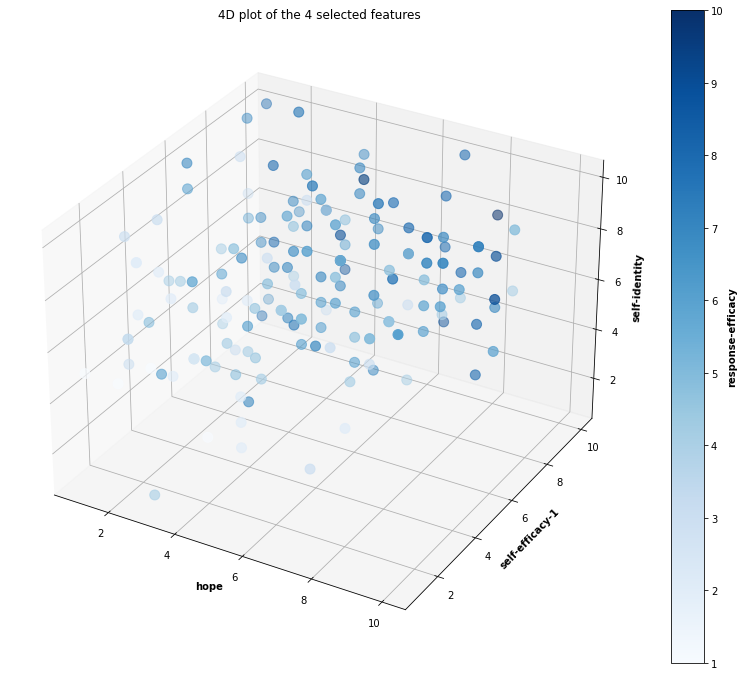

In [41]:
plot3d(df['hope'],df['self-efficacy-1'],df['self-identity'],df['response-efficacy'])

In [42]:
def interactiveplot3d(assesment_questions,x_axis,y_axis,z_axis,c_axis):
    
    x = x_axis
    y = y_axis
    z = z_axis
    c = c_axis
    fig = px.scatter_3d(assesment_questions, x=x, y=y, z=z,
                        color=c,
                        color_continuous_scale=px.colors.sequential.Viridis,
                        labels=dict(x=f"x={x_axis.name}", 
                                    y=f"y={y_axis.name}", 
                                    z=f"z={z_axis.name}",
                                    color=f"{c_axis.name}"),
                        title="4D Scatter Plot",
                        width=1000,
                        height=800)
    

    fig.update_traces(marker={'size': 6})
    fig.show()

In [43]:
import plotly.express as px
testdf = df[['hope', 'self-efficacy-1', 'self-identity','response-efficacy']]
interactiveplot3d(testdf,df['hope'],df['self-efficacy-1'],df['self-identity'],df['response-efficacy'])

## Feature Selection

### 3.1 PCA Analysis 

#### 3.1.1 PCA Analysis with all variables

In [44]:

assesment_questions = df[['worry-1', 'hope', 'self-efficacy-1', 'response-efficacy',
       'willingness-to-sacrifice', 'self-perceived-knowledge', 'self-identity',
       'self-efficacy-2', 'worry-2']]

assesment_questions_labels = assesment_questions.columns
assesment_questions_labels
assesment_questions_labels

Index(['worry-1', 'hope', 'self-efficacy-1', 'response-efficacy',
       'willingness-to-sacrifice', 'self-perceived-knowledge', 'self-identity',
       'self-efficacy-2', 'worry-2'],
      dtype='object')

In [45]:
assesment_questions_2 = assesment_questions

from sklearn.decomposition import PCA 

ncomponents=4

'pca = PCA(n_components=ncomponents, random_state=2020)\n\npca.fit_transform(assesment_questions_2)\nexplained_sum = sum(pca.explained_variance_ratio_)'

In [49]:
#plots cumsum over the number of components of the given dataset. 
def elbowpca(assesment_questions):
    #pca 
    pca = PCA(random_state=2020)
    pca.fit_transform(assesment_questions)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(range(1,(len(assesment_questions.columns)+1)),np.cumsum(pca.explained_variance_ratio_))
    ax.set_xlabel('number of components')
    ax.set_ylabel('cumulative explained variance');
    plt.show()

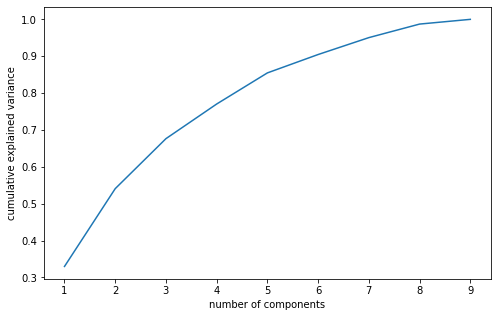

In [50]:
elbowpca(assesment_questions)

In [51]:
def elbowpcaoptimal(assesment_questions,ncomponents):
    #pca 
    pca = PCA(random_state=2020)
    pca.fit_transform(assesment_questions)
    cumsum = np.cumsum(pca.explained_variance_ratio_) #accumulative sum used to return the coordinates for h/vlines
    #plotting
    color = 'red'
    linestyles = 'dashed'
    linewidths = 1
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(range(1,(len(assesment_questions.columns)+1)),np.cumsum(pca.explained_variance_ratio_))
    ax.hlines(y=cumsum[ncomponents-1], xmin=0,xmax=ncomponents, color=color, linestyles=linestyles, linewidths=linewidths)
    ax.vlines(x=ncomponents, ymin=0, ymax=cumsum[ncomponents-1],color=color, linestyles=linestyles, linewidths=linewidths)
    ax.set_xlabel('number of components')
    ax.set_ylabel('cumulative explained variance');
    plt.show()

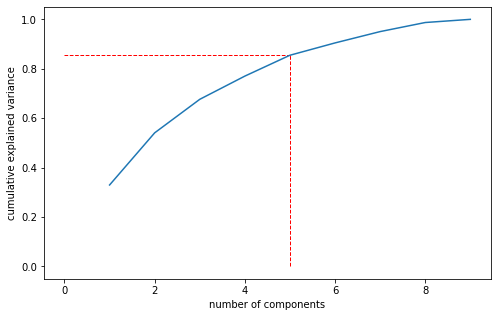

In [52]:
elbowpcaoptimal(assesment_questions,5)

In [53]:
def featureimportancelist (assesment_questions,ncomponents):
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    random_state=2020
    np.random.seed(random_state)

    # 10 samples with 5 features
    model = PCA(n_components=ncomponents).fit(assesment_questions)
    X_pc = model.transform(assesment_questions)
    # number of components
    n_pcs= model.components_.shape[0]
    # get the index of the most important feature on EACH component
    # LIST COMPREHENSION HERE
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

    initial_feature_names = assesment_questions.columns.to_list()
    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df_PCA = pd.DataFrame(dic.items())
    return df_PCA, model

In [54]:
ncomponents=5
featureimportancelist(assesment_questions,ncomponents)[0]

,0,1
0,PC0,self-efficacy-1
1,PC1,hope
2,PC2,hope
3,PC3,self-perceived-knowledge
4,PC4,self-efficacy-2


In [55]:
def plottingPCA(PCA_components,assesment_questions):
    plt.figure(figsize=(14, 12))
    for i in range(0,(len(PCA_components))):
        ax=plt.subplot(2,3,i+1)
        ax.set_xticklabels(assesment_questions.columns,rotation=90)
        plt.bar(assesment_questions.columns,abs(PCA_components[i]))
    plt.suptitle(f"PCA Analysis for feature importance of {len(PCA_components)} principal components" )
    plt.tight_layout()


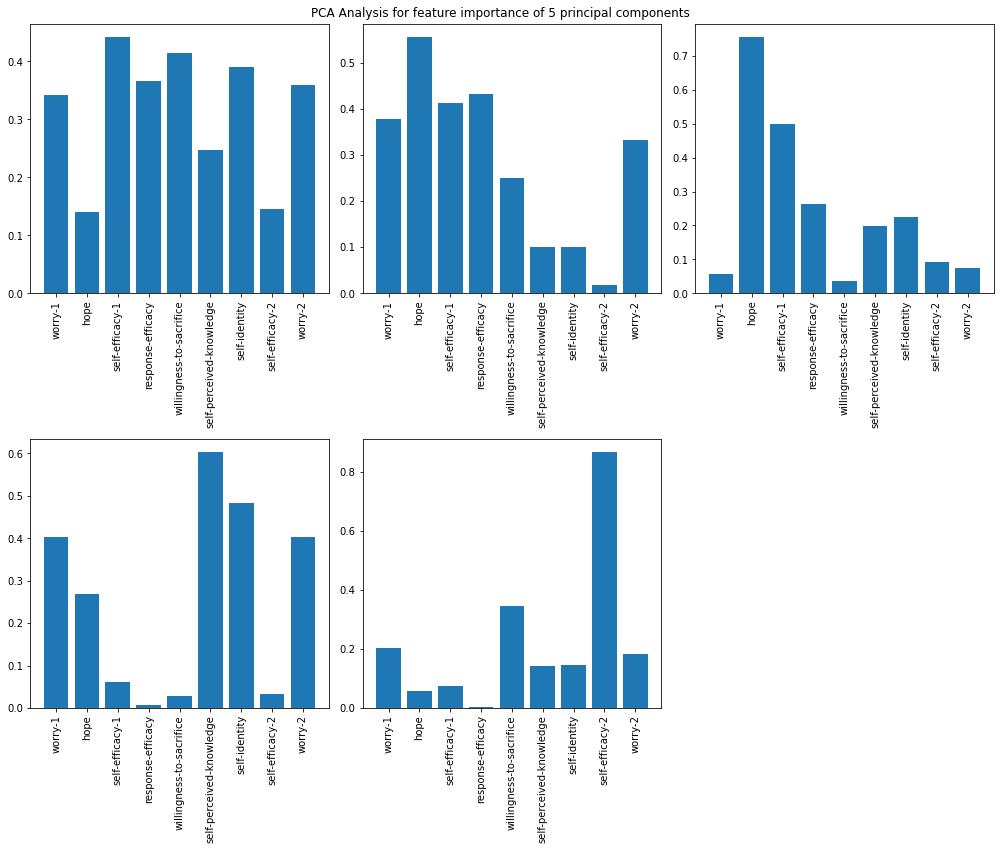

In [56]:
PCA_components = featureimportancelist(assesment_questions,ncomponents)[1].components_
plottingPCA(PCA_components, assesment_questions)

In [57]:
assesment_questions_labels[1]

'hope'

In [58]:
abs(PCA_components[1])

array([0.37749053, 0.55527698, 0.41317609, 0.43076921, 0.2499576 ,
       0.09999295, 0.09975424, 0.01887145, 0.33182427])

#### 3.1.2 PCA Analysis with selected features

In [61]:
assesment_questions_reduced = df[['hope', 'self-efficacy-1', 'response-efficacy', 'self-perceived-knowledge', 'self-identity']]

assesment_questions_labels_reduced = assesment_questions_reduced.columns
assesment_questions_labels
ncomponents=4

In [62]:
PCA_components = featureimportancelist(assesment_questions,ncomponents)[1].components_

In [63]:
featureimportancelist (assesment_questions_reduced,ncomponents)[0]

,0,1
0,PC0,self-efficacy-1
1,PC1,hope
2,PC2,self-identity
3,PC3,response-efficacy


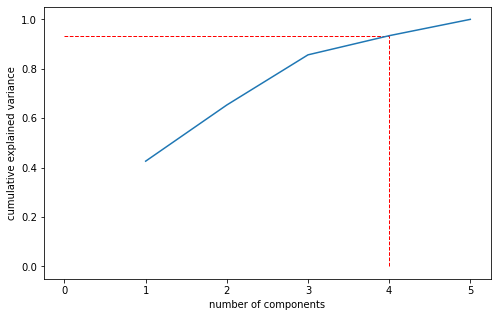

In [64]:
elbowpcaoptimal(assesment_questions_reduced,ncomponents)

In [65]:
PCA_components = featureimportancelist(assesment_questions_reduced,ncomponents)[1].components_
print(abs(PCA_components))
print(assesment_questions_labels_reduced)

[[0.3828989  0.63001457 0.56115838 0.19657212 0.32082822]
 [0.91168903 0.32881115 0.10745082 0.15233261 0.1611069 ]
 [0.06478333 0.34894594 0.24451509 0.61974177 0.65587527]
 [0.06799141 0.38178156 0.56792572 0.53527876 0.49046614]]
Index(['hope', 'self-efficacy-1', 'response-efficacy',
       'self-perceived-knowledge', 'self-identity'],
      dtype='object')


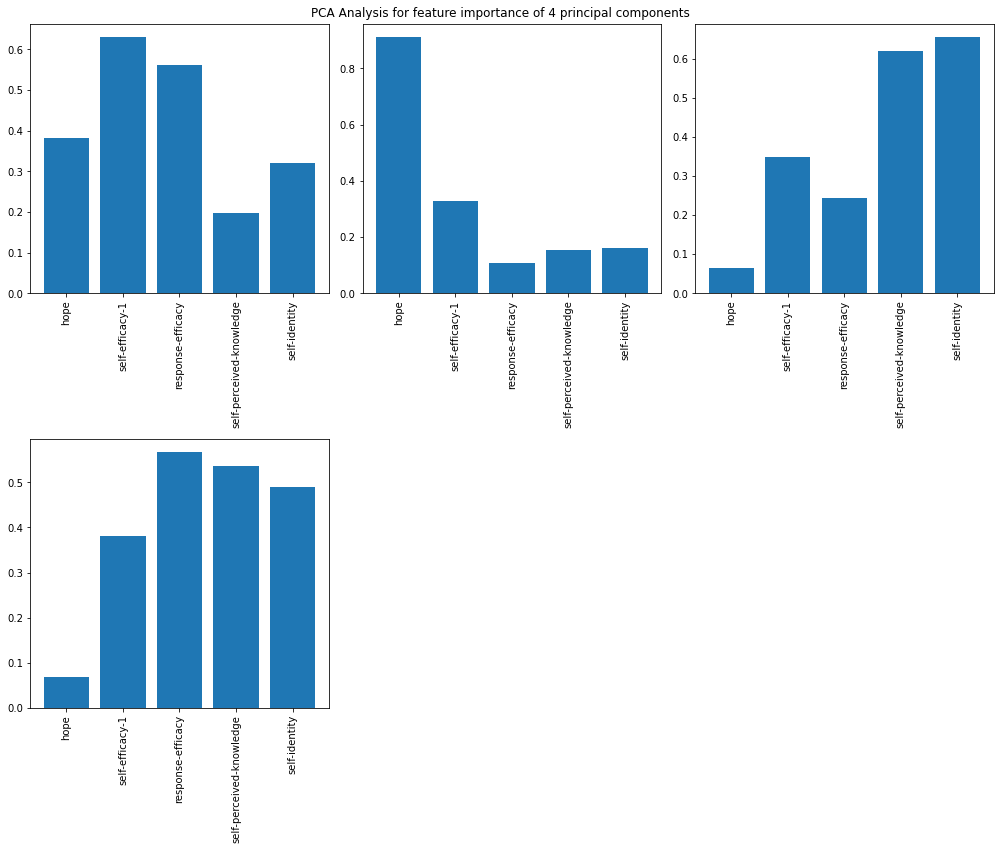

In [67]:
PCA_components = featureimportancelist(assesment_questions_reduced,ncomponents)[1].components_
len(PCA_components)
len(assesment_questions_labels)

plottingPCA(PCA_components,assesment_questions_reduced)

## 4. Clustering


### 4.1 With all features


In [68]:

assesment_questions = df[['worry-1', 'hope', 'self-efficacy-1', 'response-efficacy',
       'willingness-to-sacrifice', 'self-perceived-knowledge', 'self-identity',
       'self-efficacy-2', 'worry-2']]

assesment_questions_labels = assesment_questions.columns
assesment_questions_labels
assesment_questions_labels

Index(['worry-1', 'hope', 'self-efficacy-1', 'response-efficacy',
       'willingness-to-sacrifice', 'self-perceived-knowledge', 'self-identity',
       'self-efficacy-2', 'worry-2'],
      dtype='object')

In [69]:

seed=2020
def clusterallocation(k, assesment_questions):
    kmeans = KMeans(n_clusters=k,random_state=seed)
    y_pred = kmeans.fit_predict(assesment_questions)
    return y_pred


In [70]:
def centroids(k,assesment_questions):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit_predict(assesment_questions)
    centroids = kmeans.cluster_centers_
    return centroids

In [71]:
def kmeans_score(assesment_questions):
    color = 'blue'
    score = []
    counter = []
    for i in range(1,10):
        counter.append(i)
        k=i
        kmeans = KMeans(n_clusters=k)
        #removed from below y_pred = 
        kmeans.fit_predict(assesment_questions)
        score.append(kmeans.inertia_)
    plt.plot(counter, score,linestyle='solid', color=color)
    plt.scatter(x=counter,y=score, color=color)

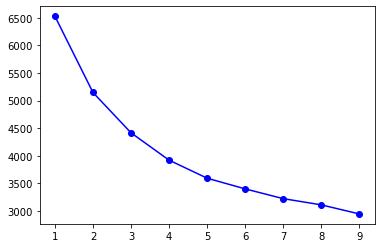

In [72]:
kmeans_score(assesment_questions)

In [73]:
k=4

In [74]:
pd.DataFrame(clusterallocation(k,assesment_questions)).value_counts()

0    60
1    51
3    43
2    30
dtype: int64

In [75]:
centroids(k,assesment_questions)

array([[8.85      , 3.68333333, 8.03333333, 6.56666667, 8.8       ,
        7.73333333, 7.65      , 8.63333333, 9.26666667],
       [8.1372549 , 7.52941176, 6.62745098, 6.31372549, 8.11764706,
        7.49019608, 7.15686275, 8.47058824, 8.70588235],
       [5.33333333, 4.8       , 5.13333333, 4.46666667, 5.26666667,
        5.86666667, 5.        , 7.66666667, 5.46666667],
       [8.86046512, 3.13953488, 3.53488372, 3.44186047, 8.1627907 ,
        6.60465116, 6.        , 8.1627907 , 9.13953488]])

In [76]:
assesment_questions_labels

Index(['worry-1', 'hope', 'self-efficacy-1', 'response-efficacy',
       'willingness-to-sacrifice', 'self-perceived-knowledge', 'self-identity',
       'self-efficacy-2', 'worry-2'],
      dtype='object')

In [77]:
def cluster_description(kmeans_centroids,assesment_questions): 
    plt.figure(figsize=(12, 12))
    for i in range(0,(len(kmeans_centroids))):
        ax=plt.subplot(2,2,i+1)
        ax.set_xticklabels(assesment_questions.columns,rotation=90)
        ax.set_ylim(0,10)
        plt.bar(assesment_questions.columns,abs(kmeans_centroids[i]))
    plt.suptitle(f"Kmeans analysis with {len(kmeans_centroids)} clusters" )
    plt.tight_layout()

In [78]:
k=4

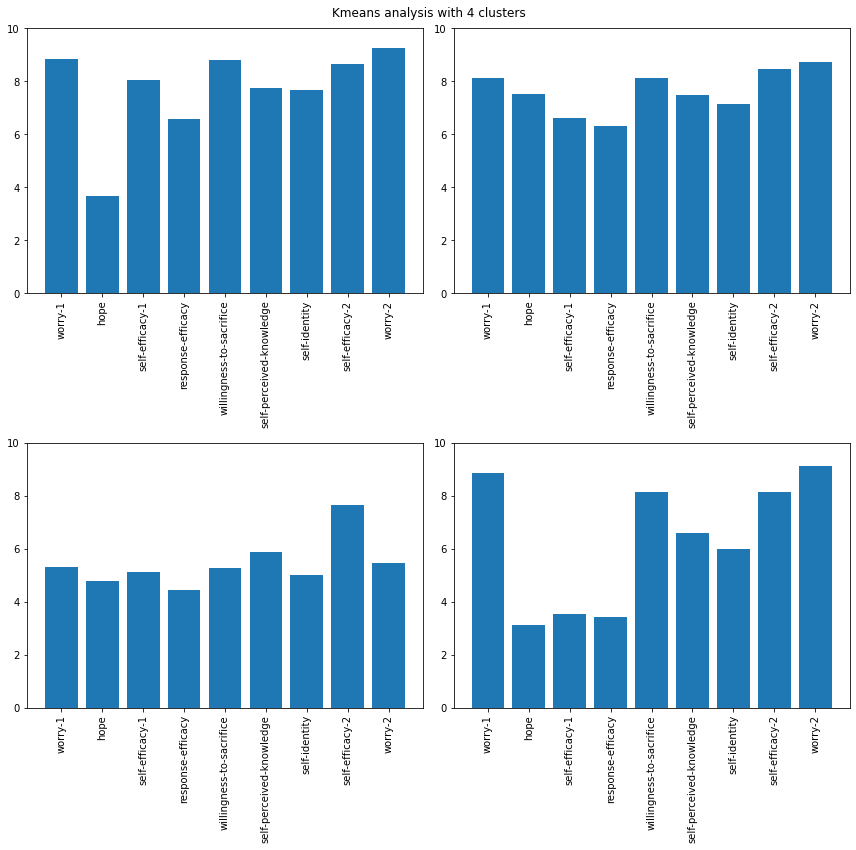

In [79]:
cluster_description(centroids(k,assesment_questions),assesment_questions)

### 4.2 With selected features

In [80]:
#building the new dataframe
assesment_questions_reduced = df[['hope', 'self-efficacy-1', 'self-identity','response-efficacy']]

assesment_questions_labels_reduced = assesment_questions_reduced.columns
assesment_questions_labels_reduced

Index(['hope', 'self-efficacy-1', 'self-identity', 'response-efficacy'], dtype='object')

In [81]:
assesment_questions_reduced

,hope,self-efficacy-1,self-identity,response-efficacy
0,3,4,4,4
1,3,3,5,4
2,7,8,8,8
3,5,7,7,5
4,5,9,8,5
...,...,...,...,...
204,4,6,5,7
205,7,4,5,4
206,7,2,3,3
207,7,9,7,8


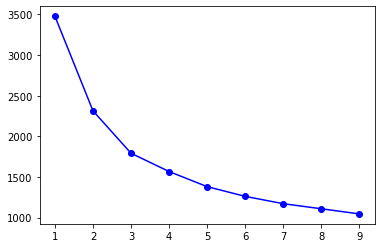

In [82]:
kmeans_score(assesment_questions_reduced)

In [83]:
kmeans = KMeans(n_clusters=k)
kmeans.fit_predict(assesment_questions_reduced)
kmeans.inertia_

1569.8317946505606

In [84]:
k=4

In [85]:
pd.DataFrame(clusterallocation(k,assesment_questions_reduced)).value_counts()

0    51
1    51
2    42
3    40
dtype: int64

In [86]:
centroids(k,assesment_questions_reduced)

array([[5.17647059, 5.92156863, 5.80392157, 4.82352941],
       [3.25490196, 8.05882353, 7.50980392, 6.64705882],
       [7.85714286, 7.16666667, 7.64285714, 7.02380952],
       [3.1       , 2.8       , 5.8       , 2.95      ]])

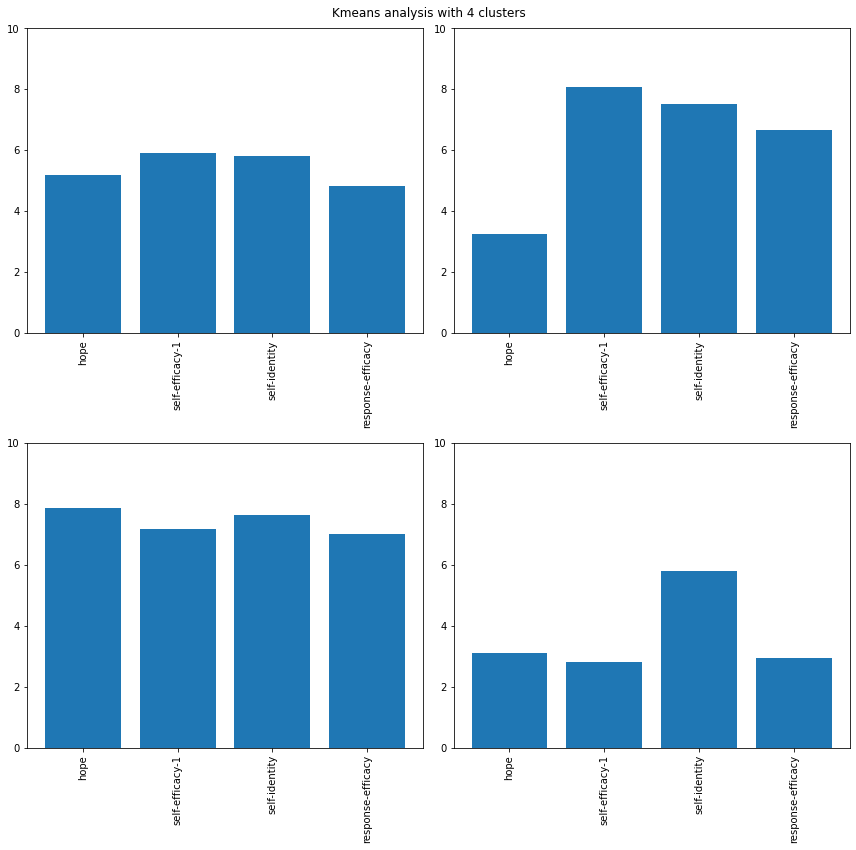

In [87]:
cluster_description(centroids(k,assesment_questions_reduced),assesment_questions_reduced)